The US Department of Agriculture makes available a database of food nutrient information. Programmer Ashley Williams made available a version of this database in JSON format.

In [0]:
!wget -qnc -P ./usda_food https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/usda_food/database.json

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
db = json.load(open("usda_food/database.json"))

In [4]:
len(db)

6636

In [5]:
type(db), type(db[0])

(list, dict)

In [6]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [7]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [0]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients = nutrients[["description", "group", "units", "value"]] 
# nutrients = nutrients.reindex(columns=["description", "group", "units", "value"])

In [9]:
nutrients.head(10) 

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


When converting a list of dicts to a DataFrame, we can specify a list of fields to extract.

In [10]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [0]:
# distribution of food groups

# pd.value_counts(info.group)[:10]

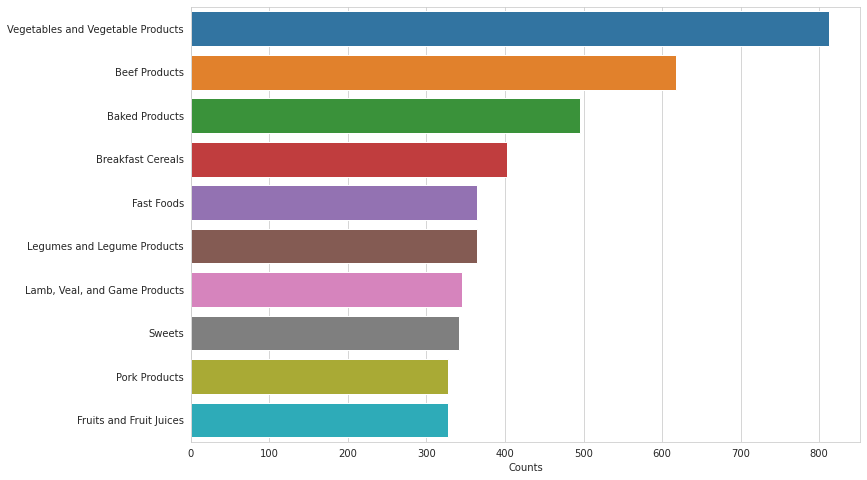

In [13]:
plt.figure(figsize=(12, 8))
_ = sns.barplot(x=pd.value_counts(info.group)[:10], y=pd.value_counts(info.group)[:10].index)
_ = plt.xlabel("Counts")

In [0]:
# for analysis of nutrients

nutrients = []

for i in db:
    fnuts = pd.DataFrame(i["nutrients"])
    fnuts['id'] = i["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [15]:
nutrients = nutrients[["description", "group", "units", "value", "id"]]
nutrients.head(10)

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [16]:
nutrients.duplicated().sum()

14179

In [0]:
nutrients = nutrients.drop_duplicates()

In [0]:
col_mapping = {'description' : 'food', 
               'group' : 'fgroup'}

In [0]:
info = info.rename(columns=col_mapping, copy=False)

In [20]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [0]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [0]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [23]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   nutrient  375176 non-null  object 
 1   nutgroup  375176 non-null  object 
 2   units     375176 non-null  object 
 3   value     375176 non-null  float64
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [0]:
# merging both dataframe to get a collective data

In [0]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [26]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nutrient      375176 non-null  object 
 1   nutgroup      375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [27]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [0]:
# for count, (i, j) in enumerate(ndata.groupby(['nutrient', 'fgroup'])['value']):
#     if count < 4:
#         print(count+1, i)
#         print(j)
#         print()
#         print()

In [29]:
# We could now make a plot of median values by food group 
# and nutrient type 

result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result.index.values

array([('Adjusted Protein', 'Sweets'),
       ('Adjusted Protein', 'Vegetables and Vegetable Products'),
       ('Alanine', 'Baby Foods'), ..., ('Zinc, Zn', 'Spices and Herbs'),
       ('Zinc, Zn', 'Sweets'),
       ('Zinc, Zn', 'Vegetables and Vegetable Products')], dtype=object)

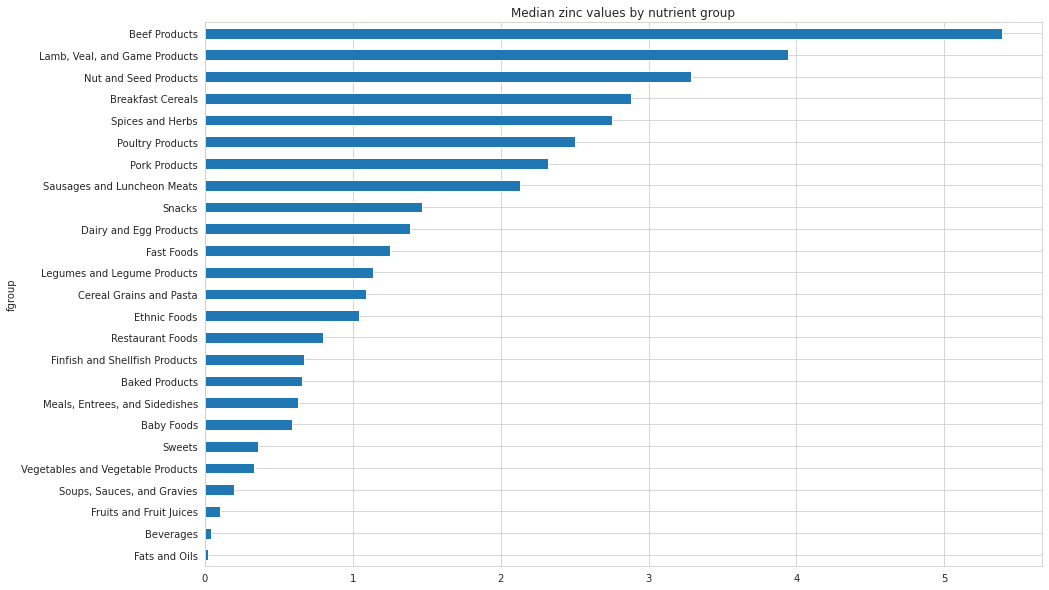

In [30]:
_ = result['Zinc, Zn'].sort_values().plot(kind="barh", figsize=(15, 10), title="Median zinc values by nutrient group")

With a little cleverness, you can find which food is most dense in each nutrient

In [0]:
# for i, (j, k) in enumerate(ndata.groupby(['nutgroup', 'nutrient'])):
#     if i < 3:
#         print(i, j)
#         print(k.loc[k.value.idxmax(), 'food'])
#         print("\n\n")

In [0]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_max = lambda x: x.loc[x.value.idxmax()]
get_min = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_max)[['value', 'food']]
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [33]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 